# **TimeSeries DataCreation**

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv('/content/Sunspots.csv')

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [ ]:
time=df['Unnamed: 0'].values
series=df['Monthly Mean Total Sunspot Number'].values

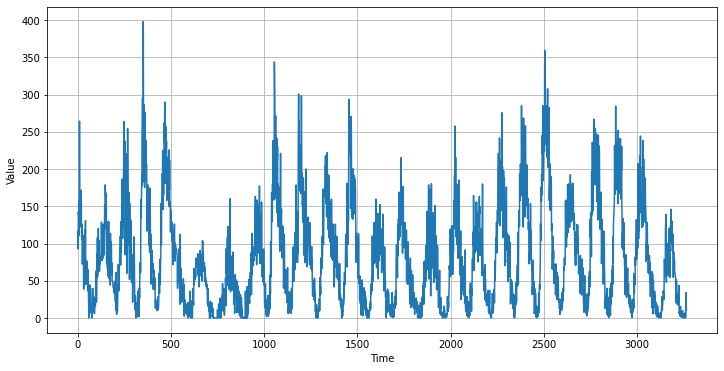

In [ ]:
plt.figure(figsize=(12,6))
plot_series(time,series)

# **Creating tensorflow dataset object**

* To create dataset for time series prediction we will be using **tensorflow dataset object.**

* **With the help of one example here I have demonstrated how to create datasetobject** .

* Then Following same steps will create dataset object for our time series sunspot data. 

In [ ]:
dataset = tf.data.Dataset.range(10)                            # Creates a Dataset of a step-separated range of values.
print('Dataset element specification:', dataset.element_spec)  # Each dataset element is a scalar tensor 

Dataset element specification: TensorSpec(shape=(), dtype=tf.int64, name=None)


In [ ]:
elements=list(dataset.as_numpy_iterator())      # Dataset object consist of 10 elements printing all of this in form of list
elements

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

**How to use Window**

* Combines (nests of) input elements into a dataset of (nests of) windows.

**window(size, shift= Defaults to size, stride=1, drop_remainder=False)**

* A "window" is a finite dataset of flat elements of size **"size"**

* The stride argument determines the stride of the input elements, and the shift argument determines the shift of the window.

In [ ]:
# Example
dataset = tf.data.Dataset.range(7).window(2)
for window in dataset:
  print(list(window.as_numpy_iterator()))
print()  



dataset = tf.data.Dataset.range(7).window(3, 2, 1, True)
for window in dataset:
  print(list(window.as_numpy_iterator()))
print()


dataset = tf.data.Dataset.range(7).window(3, 1, 2, True)
for window in dataset:
  print(list(window.as_numpy_iterator()))

[0, 1]
[2, 3]
[4, 5]
[6]

[0, 1, 2]
[2, 3, 4]
[4, 5, 6]

[0, 2, 4]
[1, 3, 5]
[2, 4, 6]


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
  for val in window_dataset:
    print(val.numpy(), end=" ")
  print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)  # dataset consist of 6 elements in which each element is compose of 5 scalar tensors  of shape=()
for window in dataset:
  print(list(window.as_numpy_iterator()))

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


**flat_map_func**- **across this dataset and flattens the result.**

* Use flat_map if you want to make sure that the order of your dataset stays the same. For example, to flatten a dataset of batches into a dataset of their elements:

In [ ]:
dataset = dataset.flat_map(lambda window: window.batch(5))   # dataset consist of 6 elements in which each element is compose of 1d tensors of shape=(5,)
for window in dataset:
  print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


**map_func**

* This transformation applies map_func to each element of this dataset, and returns a new dataset containing the transformed elements, in the same order as they appeared in the input. **map_func** can be used to change both the values and the structure of a dataset's elements. For example, adding 1 to each element, or projecting a subset of element components.

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)           # Randomly shuffles the elements of this dataset.
for x,y in dataset:
  print(x.numpy(), y.numpy())


[2 3 4 5] [6]
[1 2 3 4] [5]
[0 1 2 3] [4]
[4 5 6 7] [8]
[5 6 7 8] [9]
[3 4 5 6] [7]


**Batch**
* Combines consecutive elements of this dataset into batches.

**drop_remainder** 
* A tf.bool scalar tf.Tensor, representing whether the last batch should be dropped in the case it has fewer than batch_size elements; the default behavior is not to drop the smaller batch.

In [ ]:
dataset=tf.data.Dataset.range(10) 
dataset=dataset.batch(3,drop_remainder=True)         
for i in dataset:
  print(i) 

tf.Tensor([0 1 2], shape=(3,), dtype=int64)
tf.Tensor([3 4 5], shape=(3,), dtype=int64)
tf.Tensor([6 7 8], shape=(3,), dtype=int64)


**prefetch**
* Creates a Dataset that prefetches elements from this dataset.

* Most dataset input pipelines should end with a call to prefetch. This allows later elements to be prepared while the current element is being processed. This often improves latency and throughput, at the cost of using additional memory to store prefetched elements.

**Note:** 
* Like other Dataset methods, prefetch operates on the elements of the input dataset. It has no concept of examples vs. batches. examples.prefetch(2) will prefetch two elements (2 examples), while examples.batch(20).prefetch(2) will prefetch 2 elements (2 batches, of 20 examples each).

In [ ]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x,y in dataset:
  print("x = ", x.numpy())
  print(x.numpy().shape)
  print("y = ", y.numpy())
  print(y.numpy().shape)

x =  [[2 3 4 5]
 [5 6 7 8]]
(2, 4)
y =  [[6]
 [9]]
(2, 1)
x =  [[1 2 3 4]
 [4 5 6 7]]
(2, 4)
y =  [[5]
 [8]]
(2, 1)
x =  [[0 1 2 3]
 [3 4 5 6]]
(2, 4)
y =  [[4]
 [7]]
(2, 1)


In [ ]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):          # Following the above steps created the tensorflow dataset object.
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [ ]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

**The output shape of one element in dataset object is (32, 30) and (32,)**

In [ ]:
for x,y in dataset:                              
  #print(x.numpy(), y.numpy())
  print(x.numpy().shape)    # (32, 30)
  print(y.numpy().shape)    # (32,)
  break

(32, 30)
(32,)


# **Dataset Creation when using Convolution.**

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)                            # Expanding dimension of series ie making it a 2D array
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

**Breaking above code into parts-**

In [ ]:
time=df['Unnamed: 0'].values
series=df['Monthly Mean Total Sunspot Number'].values

In [ ]:
series = tf.expand_dims(series, axis=-1) 
series.shape 

TensorShape([3265, 1])

In [ ]:
series

<tf.Tensor: shape=(3265, 1), dtype=float64, numpy=
array([[ 96.7],
       [104.3],
       [116.7],
       ...,
       [ 34. ],
       [ 21.8],
       [ 10.4]])>

In [ ]:
ds = tf.data.Dataset.from_tensor_slices(series)
for i in ds:
  print(i)
  break

tf.Tensor([96.7], shape=(1,), dtype=float64)


In [ ]:
ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
for window in ds:
  print(list(window.as_numpy_iterator()))
  print(len(list(window.as_numpy_iterator())))
  break

[array([96.7]), array([104.3]), array([116.7]), array([92.8]), array([141.7]), array([139.2]), array([158.]), array([110.5]), array([126.5]), array([125.8]), array([264.3]), array([142.]), array([122.2]), array([126.5]), array([148.7]), array([147.2]), array([150.]), array([166.7]), array([142.3]), array([171.7]), array([152.]), array([109.5]), array([105.5]), array([125.7]), array([116.7]), array([72.5]), array([75.5]), array([94.]), array([101.2]), array([84.5]), array([110.5])]
31


In [ ]:
ds = ds.flat_map(lambda w: w.batch(window_size + 1))
for window in ds:
  print(window.numpy())
  print(window.numpy().shape)
  break

[[ 96.7]
 [104.3]
 [116.7]
 [ 92.8]
 [141.7]
 [139.2]
 [158. ]
 [110.5]
 [126.5]
 [125.8]
 [264.3]
 [142. ]
 [122.2]
 [126.5]
 [148.7]
 [147.2]
 [150. ]
 [166.7]
 [142.3]
 [171.7]
 [152. ]
 [109.5]
 [105.5]
 [125.7]
 [116.7]
 [ 72.5]
 [ 75.5]
 [ 94. ]
 [101.2]
 [ 84.5]
 [110.5]]
(31, 1)


In [ ]:
ds = ds.map(lambda w: (w[:-1], w[-1]))
for x,y in ds:
  print(x.numpy(), y.numpy())
  break

[[ 96.7]
 [104.3]
 [116.7]
 [ 92.8]
 [141.7]
 [139.2]
 [158. ]
 [110.5]
 [126.5]
 [125.8]
 [264.3]
 [142. ]
 [122.2]
 [126.5]
 [148.7]
 [147.2]
 [150. ]
 [166.7]
 [142.3]
 [171.7]
 [152. ]
 [109.5]
 [105.5]
 [125.7]
 [116.7]
 [ 72.5]
 [ 75.5]
 [ 94. ]
 [101.2]
 [ 84.5]] [110.5]


In [ ]:
dataset = ds.batch(batch_size).prefetch(1)

In [ ]:
dataset

<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

**The output shape of one element in dataset object is (32, 30, 1) and (32, 1)**

In [ ]:
for x,y in dataset:
  print(x.numpy(), y.numpy())
  print(x.numpy().shape)    # (32, 30, 1)
  print(y.numpy().shape)    # (32, 1)
  break

[[[ 96.7]
  [104.3]
  [116.7]
  [ 92.8]
  [141.7]
  [139.2]
  [158. ]
  [110.5]
  [126.5]
  [125.8]
  [264.3]
  [142. ]
  [122.2]
  [126.5]
  [148.7]
  [147.2]
  [150. ]
  [166.7]
  [142.3]
  [171.7]
  [152. ]
  [109.5]
  [105.5]
  [125.7]
  [116.7]
  [ 72.5]
  [ 75.5]
  [ 94. ]
  [101.2]
  [ 84.5]]

 [[104.3]
  [116.7]
  [ 92.8]
  [141.7]
  [139.2]
  [158. ]
  [110.5]
  [126.5]
  [125.8]
  [264.3]
  [142. ]
  [122.2]
  [126.5]
  [148.7]
  [147.2]
  [150. ]
  [166.7]
  [142.3]
  [171.7]
  [152. ]
  [109.5]
  [105.5]
  [125.7]
  [116.7]
  [ 72.5]
  [ 75.5]
  [ 94. ]
  [101.2]
  [ 84.5]
  [110.5]]

 [[116.7]
  [ 92.8]
  [141.7]
  [139.2]
  [158. ]
  [110.5]
  [126.5]
  [125.8]
  [264.3]
  [142. ]
  [122.2]
  [126.5]
  [148.7]
  [147.2]
  [150. ]
  [166.7]
  [142.3]
  [171.7]
  [152. ]
  [109.5]
  [105.5]
  [125.7]
  [116.7]
  [ 72.5]
  [ 75.5]
  [ 94. ]
  [101.2]
  [ 84.5]
  [110.5]
  [ 99.7]]

 [[ 92.8]
  [141.7]
  [139.2]
  [158. ]
  [110.5]
  [126.5]
  [125.8]
  [264.3]
  [142. ]
  [1